<a href="https://colab.research.google.com/github/Andicleomj/Machine-Learning/blob/main/Week3/Classification%20Model%20Decision%20Tree%20dan%20k-NN/CreditDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

* pandas: Digunakan untuk manipulasi dan analisis data, terutama untuk bekerja dengan DataFrame.
* sklearn.model_selection: Berisi fungsi untuk membagi dataset menjadi set pelatihan dan pengujian.
* sklearn.preprocessing: Mengandung fungsi untuk melakukan pra-pemrosesan data, seperti encoding dan scaling.
* sklearn.compose: Memungkinkan pembuatan objek ColumnTransformer untuk menerapkan transformasi yang berbeda pada kolom yang berbeda.
* sklearn.tree dan sklearn.neighbors: Mengandung model klasifikasi seperti Decision Tree dan k-NN.
* sklearn.metrics: Berisi fungsi untuk mengevaluasi model, seperti menghasilkan laporan klasifikasi dan menghitung AUC.


In [108]:
# Membaca dataset
data = pd.read_csv('/content/sample_data/CreditDataset.csv')

# Menampilkan beberapa baris pertama dari dataset
print(data.head())


    x1  x2   x3   x4    x5   x6   x7  x8   x9   x10  ...   x12 x13   x14  \
0  A11   6  A34  A43  1169  A65  A75   4  A93  A101  ...  A121  67  A143   
1  A12  48  A32  A43  5951  A61  A73   2  A92  A101  ...  A121  22  A143   
2  A14  12  A34  A46  2096  A61  A74   2  A93  A101  ...  A121  49  A143   
3  A11  42  A32  A42  7882  A61  A74   2  A93  A103  ...  A122  45  A143   
4  A11  24  A33  A40  4870  A61  A73   3  A93  A101  ...  A124  53  A143   

    x15 x16   x17 x18   x19   x20 Class  
0  A152   2  A173   1  A192  A201     1  
1  A152   1  A173   1  A191  A201     2  
2  A152   1  A172   2  A191  A201     1  
3  A153   1  A173   2  A191  A201     1  
4  A153   2  A173   2  A191  A201     2  

[5 rows x 21 columns]


* Menggunakan pandas untuk membaca dataset dari file CSV dan menyimpannya dalam DataFrame bernama data.
* data.head(): Menampilkan 5 baris pertama dari DataFrame untuk memberikan gambaran awal tentang data.

In [109]:
# Melihat nama-nama kolom yang ada di dataset
print(data.columns)


Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'Class'],
      dtype='object')


* data.columns: Menampilkan nama-nama kolom dalam DataFrame.

In [110]:
# Misalkan kolom target adalah kolom yang digunakan untuk klasifikasi
X = data.drop('Class', axis=1)  # Fitur
y = data['Class']  # Target

* Memisahkan fitur (X) dari target (y). Di sini, kolom 'Class' dianggap sebagai kolom target yang digunakan untuk klasifikasi. X adalah semua kolom kecuali 'Class', dan y adalah kolom 'Class'.

In [111]:
# Ubah label target menjadi biner (0 dan 1)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # Mengubah label menjadi 0 dan 1

* LabelEncoder digunakan untuk mengubah label target menjadi format numerik (biner). Misalnya, jika label aslinya adalah "A" dan "B", maka setelah di-encode menjadi 0 dan 1.

In [112]:
# Membagi dataset menjadi data latih (80%) dan data uji (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

* Menggunakan train_test_split untuk membagi dataset menjadi dua bagian: set pelatihan (80%) dan set pengujian (20%). random_state memastikan bahwa pembagian dapat direproduksi.

In [113]:
# Mengidentifikasi kolom kategori
kolom_kategori = X_train.select_dtypes(include=['object']).columns.tolist()


* Mengidentifikasi kolom yang berisi data kategori (tipe objek) dari set pelatihan.

In [114]:
column_transformer = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), kolom_kategori)],
    remainder='passthrough'  # Biarkan kolom lainnya tetap
)


* ColumnTransformer digunakan untuk menerapkan transformasi yang berbeda pada kolom yang berbeda. Di sini, OneHotEncoder digunakan untuk mengubah kolom kategori menjadi format numerik (binary), dan handle_unknown='ignore' memastikan bahwa kategori yang tidak dikenal diabaikan saat mentransformasi data.
* remainder='passthrough' artinya kolom lainnya yang bukan kategori akan tetap dipertahankan tanpa perubahan.

In [115]:
# Terapkan encoding ke data latih dan data uji
X_train_encoded = column_transformer.fit_transform(X_train)
X_test_encoded = column_transformer.transform(X_test)

* fit_transform digunakan pada set pelatihan (X_train) untuk melatih OneHotEncoder dan menerapkan encoding pada data latih.
* transform kemudian digunakan pada set pengujian (X_test) untuk menerapkan encoding yang sama tanpa melatih ulang encoder.

In [116]:
# Melakukan scaling pada data yang sudah diencode
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)


* StandardScaler: Digunakan untuk menstandarkan fitur dengan mengubah data sehingga memiliki mean (rata-rata) 0 dan varians 1. Namun, ketika menggunakan sparse matrices (seperti hasil dari OneHotEncoder), pengaturan with_mean=False diperlukan agar tidak terjadi kesalahan.
* fit_transform: Menerapkan scaling pada data latih (X_train_encoded) dan menghitung parameter scaling (mean dan varians).
* transform: Menerapkan scaling yang sama pada data uji (X_test_encoded) menggunakan parameter yang dihitung dari data latih.

In [117]:
# Melakukan scaling pada data yang sudah diencode
scaler = StandardScaler(with_mean=False)  # Pass dengan `with_mean=False` untuk sparse matrices
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

* DecisionTreeClassifier: Membuat objek model Decision Tree.
* fit: Melatih model menggunakan data latih yang sudah diencode (X_train_encoded) dan target (y_train).
* predict: Memprediksi kelas untuk data uji (X_test_encoded).

In [118]:
# Model Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_encoded, y_train)
y_pred_dt = dt_model.predict(X_test_encoded)

* classification_report: Menampilkan laporan evaluasi model yang mencakup metrik seperti precision, recall, f1-score, dan support untuk setiap kelas.
* confusion_matrix: Menghitung dan menampilkan matriks kebingungan (confusion matrix) yang menunjukkan jumlah prediksi yang benar dan salah untuk setiap kelas.

In [119]:
# Evaluasi model Decision Tree
print("Evaluasi Model Decision Tree:")
print(classification_report(y_test, y_pred_dt))
confusion_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix:")
print(confusion_matrix_dt)

Evaluasi Model Decision Tree:
              precision    recall  f1-score   support

           0       0.78      0.77      0.77       141
           1       0.47      0.49      0.48        59

    accuracy                           0.69       200
   macro avg       0.63      0.63      0.63       200
weighted avg       0.69      0.69      0.69       200

Confusion Matrix:
[[108  33]
 [ 30  29]]


* KNeighborsClassifier: Membuat objek model k-NN.
* fit: Melatih model menggunakan data latih yang sudah diskalakan (X_train_scaled) dan target (y_train).
* predict: Memprediksi kelas untuk data uji yang juga sudah diskalakan (X_test_scaled).

In [120]:
# Model k-NN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)  # Gunakan data yang sudah diskalakan
y_pred_knn = knn_model.predict(X_test_scaled)

* Mirip dengan evaluasi untuk model Decision Tree, di sini Anda mengevaluasi performa model k-NN dengan menggunakan metrik yang sama.

In [121]:
# Evaluasi model k-NN
print("\nEvaluasi Model k-NN:")
print(classification_report(y_test, y_pred_knn))
confusion_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:")
print(confusion_matrix_knn)


Evaluasi Model k-NN:
              precision    recall  f1-score   support

           0       0.79      0.89      0.83       141
           1       0.61      0.42      0.50        59

    accuracy                           0.75       200
   macro avg       0.70      0.66      0.67       200
weighted avg       0.73      0.75      0.73       200

Confusion Matrix:
[[125  16]
 [ 34  25]]


* Mirip dengan evaluasi untuk model Decision Tree, di sini Anda mengevaluasi performa model k-NN dengan menggunakan metrik yang sama.


In [122]:
# Menghitung AUC
y_pred_proba_dt = dt_model.predict_proba(X_test_encoded)[:, 1]  # Ambil probabilitas positif
y_pred_proba_knn = knn_model.predict_proba(X_test_scaled)[:, 1]
auc_dt = roc_auc_score(y_test, y_pred_proba_dt)
auc_knn = roc_auc_score(y_test, y_pred_proba_knn)

print(f"\nAUC Decision Tree: {auc_dt}")
print(f"AUC k-NN: {auc_knn}")


AUC Decision Tree: 0.6287414352686621
AUC k-NN: 0.7294746964779419


* predict_proba: Mengembalikan probabilitas dari setiap kelas untuk setiap prediksi. Di sini, Anda mengambil probabilitas dari kelas positif (indeks 1).
* roc_auc_score: Menghitung nilai AUC untuk kedua model, yang menunjukkan seberapa baik model membedakan antara kelas positif dan negatif. Nilai AUC berkisar antara 0 hingga 1, di mana nilai mendekati 1 menunjukkan model yang baik.

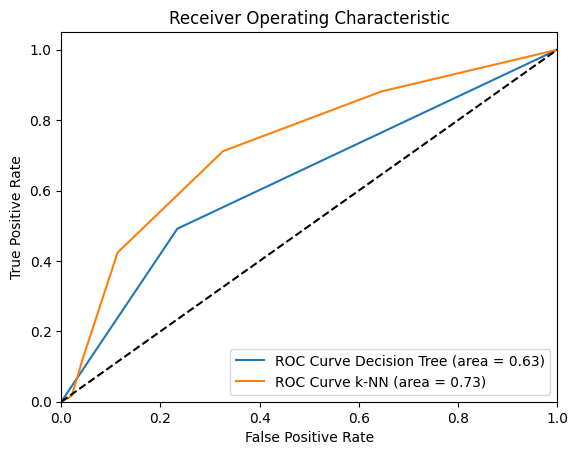

In [123]:
# Plot ROC Curve (optional)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_proba_dt)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_proba_knn)

plt.figure()
plt.plot(fpr_dt, tpr_dt, label='ROC Curve Decision Tree (area = %0.2f)' % auc_dt)
plt.plot(fpr_knn, tpr_knn, label='ROC Curve k-NN (area = %0.2f)' % auc_knn)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

* roc_curve: Menghitung false positive rate (FPR) dan true positive rate (TPR) untuk setiap threshold. Ini diperlukan untuk menggambar kurva ROC.
* plt.plot: Menggambar kurva ROC untuk masing-masing model. Kurva ROC menggambarkan hubungan antara FPR dan TPR.
* plt.show(): Menampilkan plot kurva ROC.